In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
import torch.nn.functional as F

In [2]:
# MNIST Handwritten Digit Recognition

In [3]:
# HyperParameters 1

# Добавляем наши размеры слоев
input_size=784     #28X28 pixel of image
hidden_size1=128   #size of 1st hidden layer(number of perceptron)
hidden_size2=64    #size of second hidden layer
#hidden_size3=100  #size of third hidden layer
#hidden_size=80    #size of fourth hidden layer
output_size=10     #output layer
batch_size=50      #batch size 

In [4]:
# Скачиваем датасет
train_dataset=torchvision.datasets.MNIST('TRAIN',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST('TEST',train=False,transform=transforms.ToTensor(),download=True)

In [5]:
# Создаем загрузчик данных для батчевой загрузки в оперативку
train_dataloader=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_dataloader=torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,shuffle=True)

In [6]:
# Посмотрим на наш датасет 

data=iter(train_dataloader)
X,y=next(data)
print(f"number of samples{X.shape}")
print(f"number of labels {y.shape}")

number of samplestorch.Size([50, 1, 28, 28])
number of labels torch.Size([50])


In [7]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

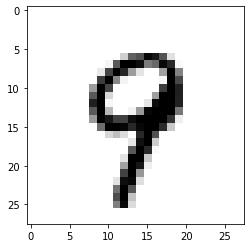

In [8]:
plt.imshow(X[49][0], cmap='gray_r')

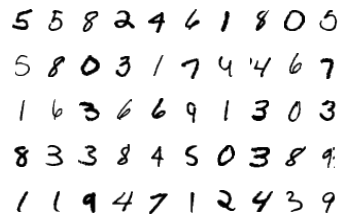

In [9]:
figure = plt.figure()
num_of_images = len(X)
for index in range(1, num_of_images+1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(X[index-1].numpy().squeeze(), cmap='gray_r')

In [105]:
# HyperParameters 2

# Создаем модель
model = nn.Sequential(nn.Linear(input_size, hidden_size1),
                      nn.ReLU(),
                      nn.Linear(hidden_size1, hidden_size2),
                      nn.ReLU(),
                      nn.Linear(hidden_size2, output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [106]:
# HyperParameters 3

# Создаем Loss и Optimizer
lr_rate=0.01
loss=nn.CrossEntropyLoss()  # Loss func
optimizer=torch.optim.Adam(model.parameters(),lr=lr_rate)  # optimizer func

In [107]:
valid_loss_history = []
train_loss_history = []

In [108]:
# Создаем функцию для просчитывания Loss на Validation данных
# тк их нету, будем брать из тестовых ( на самом деле это плохо )

def calc_loss_val():
    total_loss = 0.0
    
    with torch.no_grad():
        for img,lbl in test_dataloader:
            img=img.reshape(-1,784)
            out=model(images)
            _,pred=torch.max(out,1)
            l_i = loss(out, lbl)
            total_loss += l_i

        valid_loss_history.append(total_loss / len(test_dataloader))

In [109]:
# Создаем функцию для тренировки модели


count_epochs = 10  # кол-во эпох
for epoch in range(count_epochs):
    total_loss_per_batch = 0.0
    for i, (images,labels) in enumerate(train_dataloader):
        images = images.reshape(-1, 28*28)
        
        # Считаем loss
        output = model(images)
        Loss_i = loss(output, labels)
        
        # Считаем градиент
        optimizer.zero_grad() # обновить градиент
        Loss_i.backward()  # backpropogation algo
        optimizer.step()  # update params
        
        total_loss_per_batch += Loss_i
        
    # Делаем prints
    print("epoch={}of{}, loss={}".format(
           epoch+1, count_epochs, total_loss_per_batch/len(train_dataloader)))
    
    # Добавляем историю loss
    calc_loss_val() # val_loss
    train_loss_history.append(total_loss_per_batch/len(train_dataloader))

epoch=1of10, loss=0.24730262160301208
epoch=2of10, loss=0.1499677449464798
epoch=3of10, loss=0.1305878609418869
epoch=4of10, loss=0.12265246361494064
epoch=5of10, loss=0.10870035737752914
epoch=6of10, loss=0.10925863683223724
epoch=7of10, loss=0.09786985069513321
epoch=8of10, loss=0.09263768792152405
epoch=9of10, loss=0.08856897056102753
epoch=10of10, loss=0.08981197327375412


In [110]:
train_loss_history

[tensor(0.2473, grad_fn=<DivBackward0>),
 tensor(0.1500, grad_fn=<DivBackward0>),
 tensor(0.1306, grad_fn=<DivBackward0>),
 tensor(0.1227, grad_fn=<DivBackward0>),
 tensor(0.1087, grad_fn=<DivBackward0>),
 tensor(0.1093, grad_fn=<DivBackward0>),
 tensor(0.0979, grad_fn=<DivBackward0>),
 tensor(0.0926, grad_fn=<DivBackward0>),
 tensor(0.0886, grad_fn=<DivBackward0>),
 tensor(0.0898, grad_fn=<DivBackward0>)]

In [111]:
valid_loss_history # ?????????????????????????????????

[tensor(14.6299),
 tensor(17.6695),
 tensor(16.1251),
 tensor(18.4941),
 tensor(23.1133),
 tensor(26.8286),
 tensor(24.9476),
 tensor(28.3060),
 tensor(25.7627),
 tensor(33.3579)]

In [112]:
# Accuracy score

with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_dataloader:
        images=images.reshape(-1,784)
        output=model(images)
        labels=labels
        _,prediction=torch.max(output,1)
        n_samples+=labels.shape[0]
        n_correct+=(prediction==labels).sum().item()
accuracy=(n_correct/n_samples)*100

accuracy

96.71

In [113]:
# Other metrics

In [114]:
target = torch.Tensor()

In [115]:
preds = torch.Tensor()

In [116]:
with torch.no_grad():
    for images,labels in test_dataloader:
        images=images.reshape(-1,784)
        output=model(images)
        target=torch.cat((target,labels))
        _,prediction=torch.max(output,1)
        preds=torch.cat((preds,prediction))

In [117]:
labels

tensor([9, 1, 5, 0, 3, 4, 8, 8, 1, 8, 2, 2, 8, 2, 1, 4, 6, 7, 4, 4, 5, 6, 9, 3,
        4, 0, 6, 8, 2, 0, 6, 7, 1, 3, 4, 6, 6, 1, 0, 6, 2, 9, 7, 8, 9, 4, 2, 7,
        6, 6])

In [118]:
prediction

tensor([9, 1, 5, 0, 3, 4, 8, 8, 1, 8, 2, 2, 8, 2, 1, 4, 6, 7, 4, 4, 5, 5, 9, 3,
        4, 0, 6, 8, 2, 0, 6, 7, 1, 3, 4, 6, 6, 1, 0, 6, 2, 9, 7, 8, 9, 4, 2, 7,
        6, 6])

In [119]:
len(target)

10000

In [120]:
len(preds)

10000

In [121]:
target = target.to(torch.int)

In [122]:
preds = preds.to(torch.int)

In [123]:
# Accuracy
from torchmetrics import Accuracy
accuracy = Accuracy()
accuracy(preds, target)

tensor(0.9671)

In [124]:
# Precision
from torchmetrics import Precision
precision1 = Precision(average='macro', num_classes=10)
precision2 = Precision(average='micro', num_classes=10)
print(precision1(preds, target))
print(precision2(preds, target))

tensor(0.9674)
tensor(0.9671)


In [125]:
# Recall
from torchmetrics import Recall
recall1 = Recall(average='macro', num_classes=10)
recall2 = Recall(average='micro', num_classes=10)
print(recall1(preds, target))
print(recall2(preds, target))

tensor(0.9665)
tensor(0.9671)


In [126]:
# F1 score
from torchmetrics import F1Score
f1 = F1Score(num_classes=10)
print(f1(preds, target))

tensor(0.9671)


In [34]:
# Try to nn.NLLLoss

In [35]:
# HyperParameters 2

# Создаем модель
model2 = nn.Sequential(nn.Linear(input_size, hidden_size1),
                      nn.ReLU(),
                      nn.Linear(hidden_size1, hidden_size2),
                      nn.ReLU(),
                      nn.Linear(hidden_size2, output_size),
                      nn.LogSoftmax(dim=1))
print(model2)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [36]:
# HyperParameters 3

# Создаем Loss и Optimizer
lr_rate=0.01
loss=nn.NLLLoss()  # Loss func
optimizer=torch.optim.Adam(model2.parameters(),lr=lr_rate)  # optimizer func

In [37]:
# Создаем функцию для тренировки модели


count_epochs = 10  # кол-во эпох
for epoch in range(count_epochs):
    total_loss_per_batch = 0.0
    for i, (images,labels) in enumerate(train_dataloader):
        images = images.reshape(-1, 28*28)
        
        # Считаем loss
        output = model(images)
        Loss_i = loss(output, labels)
        
        # Считаем градиент
        optimizer.zero_grad() # обновить градиент
        Loss_i.backward()  # backpropogation algo
        optimizer.step()  # update params
        
        total_loss_per_batch += Loss_i
        # Делаем prints
    
    print("epoch={}of{}, loss={}".format(
           epoch+1, count_epochs, total_loss_per_batch/len(train_dataloader)))

epoch=1of10, loss=0.06286990642547607
epoch=2of10, loss=0.06286980211734772
epoch=3of10, loss=0.06286988407373428
epoch=4of10, loss=0.06286990642547607
epoch=5of10, loss=0.06286986917257309
epoch=6of10, loss=0.06286980211734772
epoch=7of10, loss=0.06286987662315369
epoch=8of10, loss=0.06286978721618652
epoch=9of10, loss=0.06286986917257309
epoch=10of10, loss=0.06286986172199249


In [38]:
# Accuracy score

with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_dataloader:
        images=images.reshape(-1,784)
        output=model2(images)
        labels=labels
        _,prediction=torch.max(output,1)
        n_samples+=labels.shape[0]
        n_correct+=(prediction==labels).sum().item()
accuracy=(n_correct/n_samples)*100

accuracy

9.48